<a href="https://colab.research.google.com/github/royleekiat/Employee_attrition_predictor/blob/main/Employee_attrition_predictor_Roy_Lee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

Model is based on Red Dragon AI's class example


```
Structured data classification from scratch
Author: [fchollet](https://twitter.com/fchollet)
Description: Binary classification of structured data including numerical and categorical features.
```



# Dataset

This project targets to predict employee attrition based on Kaggle dataset [Employee Attrition](https://www.kaggle.com/colearninglounge/employee-attrition)

Install Tensorflow 2.3 or tf-nightly

In [16]:
%pip -q install tf-nightly

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
tf.__version__

'2.4.0-dev20201002'

In [4]:
#file_url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vQ-E-LxIGduZgEEwGAOtV5RFcO60_GkunriGBzwxjK9xiUoG54SQJbQWWtSo_WeNDEz-CtuKv_ZKFE-/pub?gid=581336355&single=true&output=csv"
file_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRTzmPbXWcC6mfBDE1MBg5HoHsYlvYtkZp8oJFHfIMNzqiG6P4cdGaceWsxW9JS6ip9vdJYCNrDEbOx/pub?gid=581336355&single=true&output=csv"
dataframe = pd.read_csv(file_url)
dataframe.shape


(1029, 37)

In [5]:
dataframe.head(n=50)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionBinary
0,1,50,No,Travel_Rarely,1126,Research & Development,1,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3,0
1,2,36,No,Travel_Rarely,216,Research & Development,6,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1,0
2,3,21,Yes,Travel_Rarely,337,Sales,7,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0,1
3,4,50,No,Travel_Frequently,1246,Human Resources,23,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7,0
4,5,52,No,Travel_Rarely,994,Research & Development,7,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0,0
5,6,33,Yes,Travel_Rarely,1277,Research & Development,15,1,Medical,1,582,2,Male,56,3,3,Manager,3,Married,13610,24619,7,Y,Yes,12,3,4,80,0,15,2,4,7,6,7,7,1
6,7,47,No,Travel_Rarely,1001,Research & Development,4,3,Life Sciences,1,1827,3,Female,92,2,3,Manufacturing Director,2,Divorced,10333,19271,8,Y,Yes,12,3,3,80,1,28,4,3,22,11,14,10,0
7,8,22,No,Travel_Rarely,1230,Research & Development,1,2,Life Sciences,1,872,4,Male,33,2,2,Manufacturing Director,4,Married,4775,19146,6,Y,No,22,4,1,80,2,4,2,1,2,2,2,2,0
8,9,47,Yes,Travel_Rarely,890,Research & Development,2,4,Medical,1,828,3,Male,46,3,1,Research Scientist,3,Single,4382,16374,6,Y,No,17,3,4,80,0,5,3,2,2,2,2,1,1
9,10,33,No,Non-Travel,530,Sales,16,3,Life Sciences,1,1681,3,Female,36,3,2,Sales Executive,4,Divorced,5368,16130,1,Y,Yes,25,4,3,80,1,7,2,3,6,5,1,2,0


I added a column "AttritionBinary" beside to the dataset to make it easier to process the data :) . No = 0, 1 = Yes. 

The data has 1029 rows and 36 columns.

Drop useless columns
- id	
- Attrition	
- EmployeeCount	
- EmployeeNumber

In [6]:
dataframe = dataframe.drop(['id','Attrition','EmployeeCount','EmployeeNumber'], axis=1)
dataframe.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionBinary
0,50,Travel_Rarely,1126,Research & Development,1,2,Medical,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3,0
1,36,Travel_Rarely,216,Research & Development,6,2,Medical,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1,0
2,21,Travel_Rarely,337,Sales,7,1,Marketing,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0,1
3,50,Travel_Frequently,1246,Human Resources,23,3,Medical,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7,0
4,52,Travel_Rarely,994,Research & Development,7,4,Life Sciences,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0,0


In [7]:
val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 823 samples for training and 206 for validation


In [8]:

def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("AttritionBinary")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

In [9]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'Age': <tf.Tensor: shape=(), dtype=int64, numpy=55>, 'BusinessTravel': <tf.Tensor: shape=(), dtype=string, numpy=b'Travel_Rarely'>, 'DailyRate': <tf.Tensor: shape=(), dtype=int64, numpy=681>, 'Department': <tf.Tensor: shape=(), dtype=string, numpy=b'Research & Development'>, 'DistanceFromHome': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'Education': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'EducationField': <tf.Tensor: shape=(), dtype=string, numpy=b'Technical Degree'>, 'EnvironmentSatisfaction': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'Gender': <tf.Tensor: shape=(), dtype=string, numpy=b'Male'>, 'HourlyRate': <tf.Tensor: shape=(), dtype=int64, numpy=98>, 'JobInvolvement': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'JobLevel': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'JobRole': <tf.Tensor: shape=(), dtype=string, numpy=b'Research Scientist'>, 'JobSatisfaction': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'MaritalStatus': <tf.Tensor: shape=(), dtype=string, num

In [10]:
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

Feature preprocessing with Keras layers
The following features are categorical features encoded as integers:

- Education	
- EnvironmentSatisfaction	
- JobInvolvement	
- JobLevel	
- JobSatisfaction	
- PerformanceRating	
- RelationshipSatisfaction	
- StandardHours	
- StockOptionLevel	
- WorkLifeBalance	


We will encode these features using one-hot encoding using the CategoryEncoding() layer.

We also have some categorical features encoded as strings: 

- BusinessTravel	
- Department	
- EducationField	
- Gender	
- JobRole	
- MaritalStatus	
- Over18	
- OverTime

We will first create an index of all possible features using the StringLookup() layer, then we will one-hot encode the output indices using a CategoryEncoding() layer.

Finally, the following feature are continuous numerical features:

- Age	
- DailyRate
- DistanceFromHome	
- HourlyRate	
- MonthlyIncome	
- MonthlyRate	
- NumCompaniesWorked	
- PercentSalaryHike	
- TotalWorkingYears	
- TrainingTimesLastYear	
- YearsAtCompany	
- YearsInCurrentRole	
- YearsSinceLastPromotion	
- YearsWithCurrManager	


For each of these features, we will use a Normalization() layer to make sure the mean of each feature is 0 and its standard deviation is 1.

Below, we define 3 utility functions to do the operations:

encode_numerical_feature to apply featurewise normalization to numerical features.
encode_string_categorical_feature to first turn string inputs into integer indices, then one-hot encode these integer indices.
encode_integer_categorical_feature to one-hot encode integer categorical features.

In [11]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.layers.experimental.preprocessing import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_string_categorical_feature(feature, name, dataset):
    # Create a StringLookup layer which will turn strings into integer indices
    index = StringLookup()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the set of possible string values and assign them a fixed integer index
    index.adapt(feature_ds)

    # Turn the string input into integer indices
    encoded_feature = index(feature)

    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a dataset of indices
    feature_ds = feature_ds.map(index)

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(encoded_feature)
    return encoded_feature


def encode_integer_categorical_feature(feature, name, dataset):
    # Create a CategoryEncoding for our integer indices
    encoder = CategoryEncoding(output_mode="binary")

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the space of possible indices
    encoder.adapt(feature_ds)

    # Apply one-hot encoding to our indices
    encoded_feature = encoder(feature)
    return encoded_feature



Build Model

In [12]:
# Categorical features encoded as integers
'''
Education
EnvironmentSatisfaction
JobInvolvement
JobLevel
JobSatisfaction
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
WorkLifeBalance
'''
Education = keras.Input(shape=(1,), name="Education", dtype="int64")
EnvironmentSatisfaction = keras.Input(shape=(1,), name="EnvironmentSatisfaction", dtype="int64")
JobInvolvement = keras.Input(shape=(1,), name="JobInvolvement", dtype="int64")
JobLevel = keras.Input(shape=(1,), name="JobLevel", dtype="int64")
JobSatisfaction = keras.Input(shape=(1,), name="JobSatisfaction", dtype="int64")
PerformanceRating = keras.Input(shape=(1,), name="PerformanceRating", dtype="int64")
RelationshipSatisfaction = keras.Input(shape=(1,), name="RelationshipSatisfaction", dtype="int64")
StandardHours = keras.Input(shape=(1,), name="StandardHours", dtype="int64")
StockOptionLevel = keras.Input(shape=(1,), name="StockOptionLevel", dtype="int64")
WorkLifeBalance = keras.Input(shape=(1,), name="WorkLifeBalance", dtype="int64")

# Categorical feature encoded as string
'''
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
Over18
OverTime
'''
BusinessTravel = keras.Input(shape=(1,), name="BusinessTravel", dtype="string")
Department = keras.Input(shape=(1,), name="Department", dtype="string")
EducationField = keras.Input(shape=(1,), name="EducationField", dtype="string")
Gender = keras.Input(shape=(1,), name="Gender", dtype="string")
JobRole = keras.Input(shape=(1,), name="JobRole", dtype="string")
MaritalStatus = keras.Input(shape=(1,), name="MaritalStatus", dtype="string")
Over18 = keras.Input(shape=(1,), name="Over18", dtype="string")
OverTime = keras.Input(shape=(1,), name="OverTime", dtype="string")

# Numerical features

'''
Age
DailyRate
DistanceFromHome
HourlyRate
MonthlyIncome
MonthlyRate
NumCompaniesWorked
PercentSalaryHike
TotalWorkingYears
TrainingTimesLastYear
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
'''

Age = keras.Input(shape=(1,), name="Age")
DailyRate = keras.Input(shape=(1,), name="DailyRate")
DistanceFromHome = keras.Input(shape=(1,), name="DistanceFromHome")
HourlyRate = keras.Input(shape=(1,), name="HourlyRate")
MonthlyIncome = keras.Input(shape=(1,), name="MonthlyIncome")
MonthlyRate = keras.Input(shape=(1,), name="MonthlyRate")
NumCompaniesWorked = keras.Input(shape=(1,), name="NumCompaniesWorked")
PercentSalaryHike = keras.Input(shape=(1,), name="PercentSalaryHike")
TotalWorkingYears = keras.Input(shape=(1,), name="TotalWorkingYears")
TrainingTimesLastYear = keras.Input(shape=(1,), name="TrainingTimesLastYear")
YearsAtCompany = keras.Input(shape=(1,), name="YearsAtCompany")
YearsInCurrentRole = keras.Input(shape=(1,), name="YearsInCurrentRole")
YearsSinceLastPromotion = keras.Input(shape=(1,), name="YearsSinceLastPromotion")
YearsWithCurrManager = keras.Input(shape=(1,), name="YearsWithCurrManager")

all_inputs = [
    Education,
    EnvironmentSatisfaction,
    JobInvolvement,
    JobLevel,
    JobSatisfaction,
    PerformanceRating,
    RelationshipSatisfaction,
    StandardHours,
    StockOptionLevel,
    WorkLifeBalance,

    BusinessTravel,
    Department,
    EducationField,
    Gender,
    JobRole,
    MaritalStatus,
    Over18,
    OverTime,

    Age,
    DailyRate,
    DistanceFromHome,
    HourlyRate,
    MonthlyIncome,
    MonthlyRate,
    NumCompaniesWorked,
    PercentSalaryHike,
    TotalWorkingYears,
    TrainingTimesLastYear,
    YearsAtCompany,
    YearsInCurrentRole,
    YearsSinceLastPromotion,
    YearsWithCurrManager
]

# Integer categorical features
Education_encoded = encode_integer_categorical_feature(Education, "Education", train_ds)
EnvironmentSatisfaction_encoded = encode_integer_categorical_feature(EnvironmentSatisfaction, "EnvironmentSatisfaction", train_ds)
JobInvolvement_encoded = encode_integer_categorical_feature(JobInvolvement, "JobInvolvement", train_ds)
JobLevel_encoded = encode_integer_categorical_feature(JobLevel, "JobLevel", train_ds)
JobSatisfaction_encoded = encode_integer_categorical_feature(JobSatisfaction, "JobSatisfaction", train_ds)
PerformanceRating_encoded = encode_integer_categorical_feature(PerformanceRating, "PerformanceRating", train_ds)
RelationshipSatisfaction_encoded = encode_integer_categorical_feature(RelationshipSatisfaction, "RelationshipSatisfaction", train_ds)
StandardHours_encoded = encode_integer_categorical_feature(StandardHours, "StandardHours", train_ds)
StockOptionLevel_encoded = encode_integer_categorical_feature(StockOptionLevel, "StockOptionLevel", train_ds)
WorkLifeBalance_encoded = encode_integer_categorical_feature(WorkLifeBalance, "WorkLifeBalance", train_ds)

# String categorical features
BusinessTravel_encoded = encode_string_categorical_feature(BusinessTravel, "BusinessTravel", train_ds)
Department_encoded = encode_string_categorical_feature(Department, "Department", train_ds)
EducationField_encoded = encode_string_categorical_feature(EducationField, "EducationField", train_ds)
Gender_encoded = encode_string_categorical_feature(Gender, "Gender", train_ds)
JobRole_encoded = encode_string_categorical_feature(JobRole, "JobRole", train_ds)
MaritalStatus_encoded = encode_string_categorical_feature(MaritalStatus, "MaritalStatus", train_ds)
Over18_encoded = encode_string_categorical_feature(Over18, "Over18", train_ds)
OverTime_encoded = encode_string_categorical_feature(OverTime, "OverTime", train_ds)

# Numerical features
Age_encoded = encode_numerical_feature(Age, "Age", train_ds)
DailyRate_encoded = encode_numerical_feature(DailyRate, "DailyRate", train_ds)
DistanceFromHome_encoded = encode_numerical_feature(DistanceFromHome, "DistanceFromHome", train_ds)
HourlyRate_encoded = encode_numerical_feature(HourlyRate, "HourlyRate", train_ds)
MonthlyIncome_encoded = encode_numerical_feature(MonthlyIncome, "MonthlyIncome", train_ds)
MonthlyRate_encoded = encode_numerical_feature(MonthlyRate, "MonthlyRate", train_ds)
NumCompaniesWorked_encoded = encode_numerical_feature(NumCompaniesWorked, "NumCompaniesWorked", train_ds)
PercentSalaryHike_encoded = encode_numerical_feature(PercentSalaryHike, "PercentSalaryHike", train_ds)
TotalWorkingYears_encoded = encode_numerical_feature(TotalWorkingYears, "TotalWorkingYears", train_ds)
TrainingTimesLastYear_encoded = encode_numerical_feature(TrainingTimesLastYear, "TrainingTimesLastYear", train_ds)
YearsAtCompany_encoded = encode_numerical_feature(YearsAtCompany, "YearsAtCompany", train_ds)
YearsInCurrentRole_encoded = encode_numerical_feature(YearsInCurrentRole, "YearsInCurrentRole", train_ds)
YearsSinceLastPromotion_encoded = encode_numerical_feature(YearsSinceLastPromotion, "YearsSinceLastPromotion", train_ds)
YearsWithCurrManager_encoded = encode_numerical_feature(YearsWithCurrManager, "YearsWithCurrManager", train_ds)

all_features = layers.concatenate(
    [
      Education_encoded,
      EnvironmentSatisfaction_encoded,
      JobInvolvement_encoded,
      JobLevel_encoded,
      JobSatisfaction_encoded,
      PerformanceRating_encoded,
      RelationshipSatisfaction_encoded,
      StandardHours_encoded,
      StockOptionLevel_encoded,
      WorkLifeBalance_encoded,
      BusinessTravel_encoded,
      Department_encoded,
      EducationField_encoded,
      Gender_encoded,
      JobRole_encoded,
      MaritalStatus_encoded,
      Over18_encoded,
      OverTime_encoded,
      Age_encoded,
      DailyRate_encoded,
      DistanceFromHome_encoded,
      HourlyRate_encoded,
      MonthlyIncome_encoded,
      MonthlyRate_encoded,
      NumCompaniesWorked_encoded,
      PercentSalaryHike_encoded,
      TotalWorkingYears_encoded,
      TrainingTimesLastYear_encoded,
      YearsAtCompany_encoded,
      YearsInCurrentRole_encoded,
      YearsSinceLastPromotion_encoded,
      YearsWithCurrManager_encoded
    ]
)
x = layers.Dense(32, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(all_inputs, output)

model.compile("adam", "binary_crossentropy", metrics=["accuracy"])


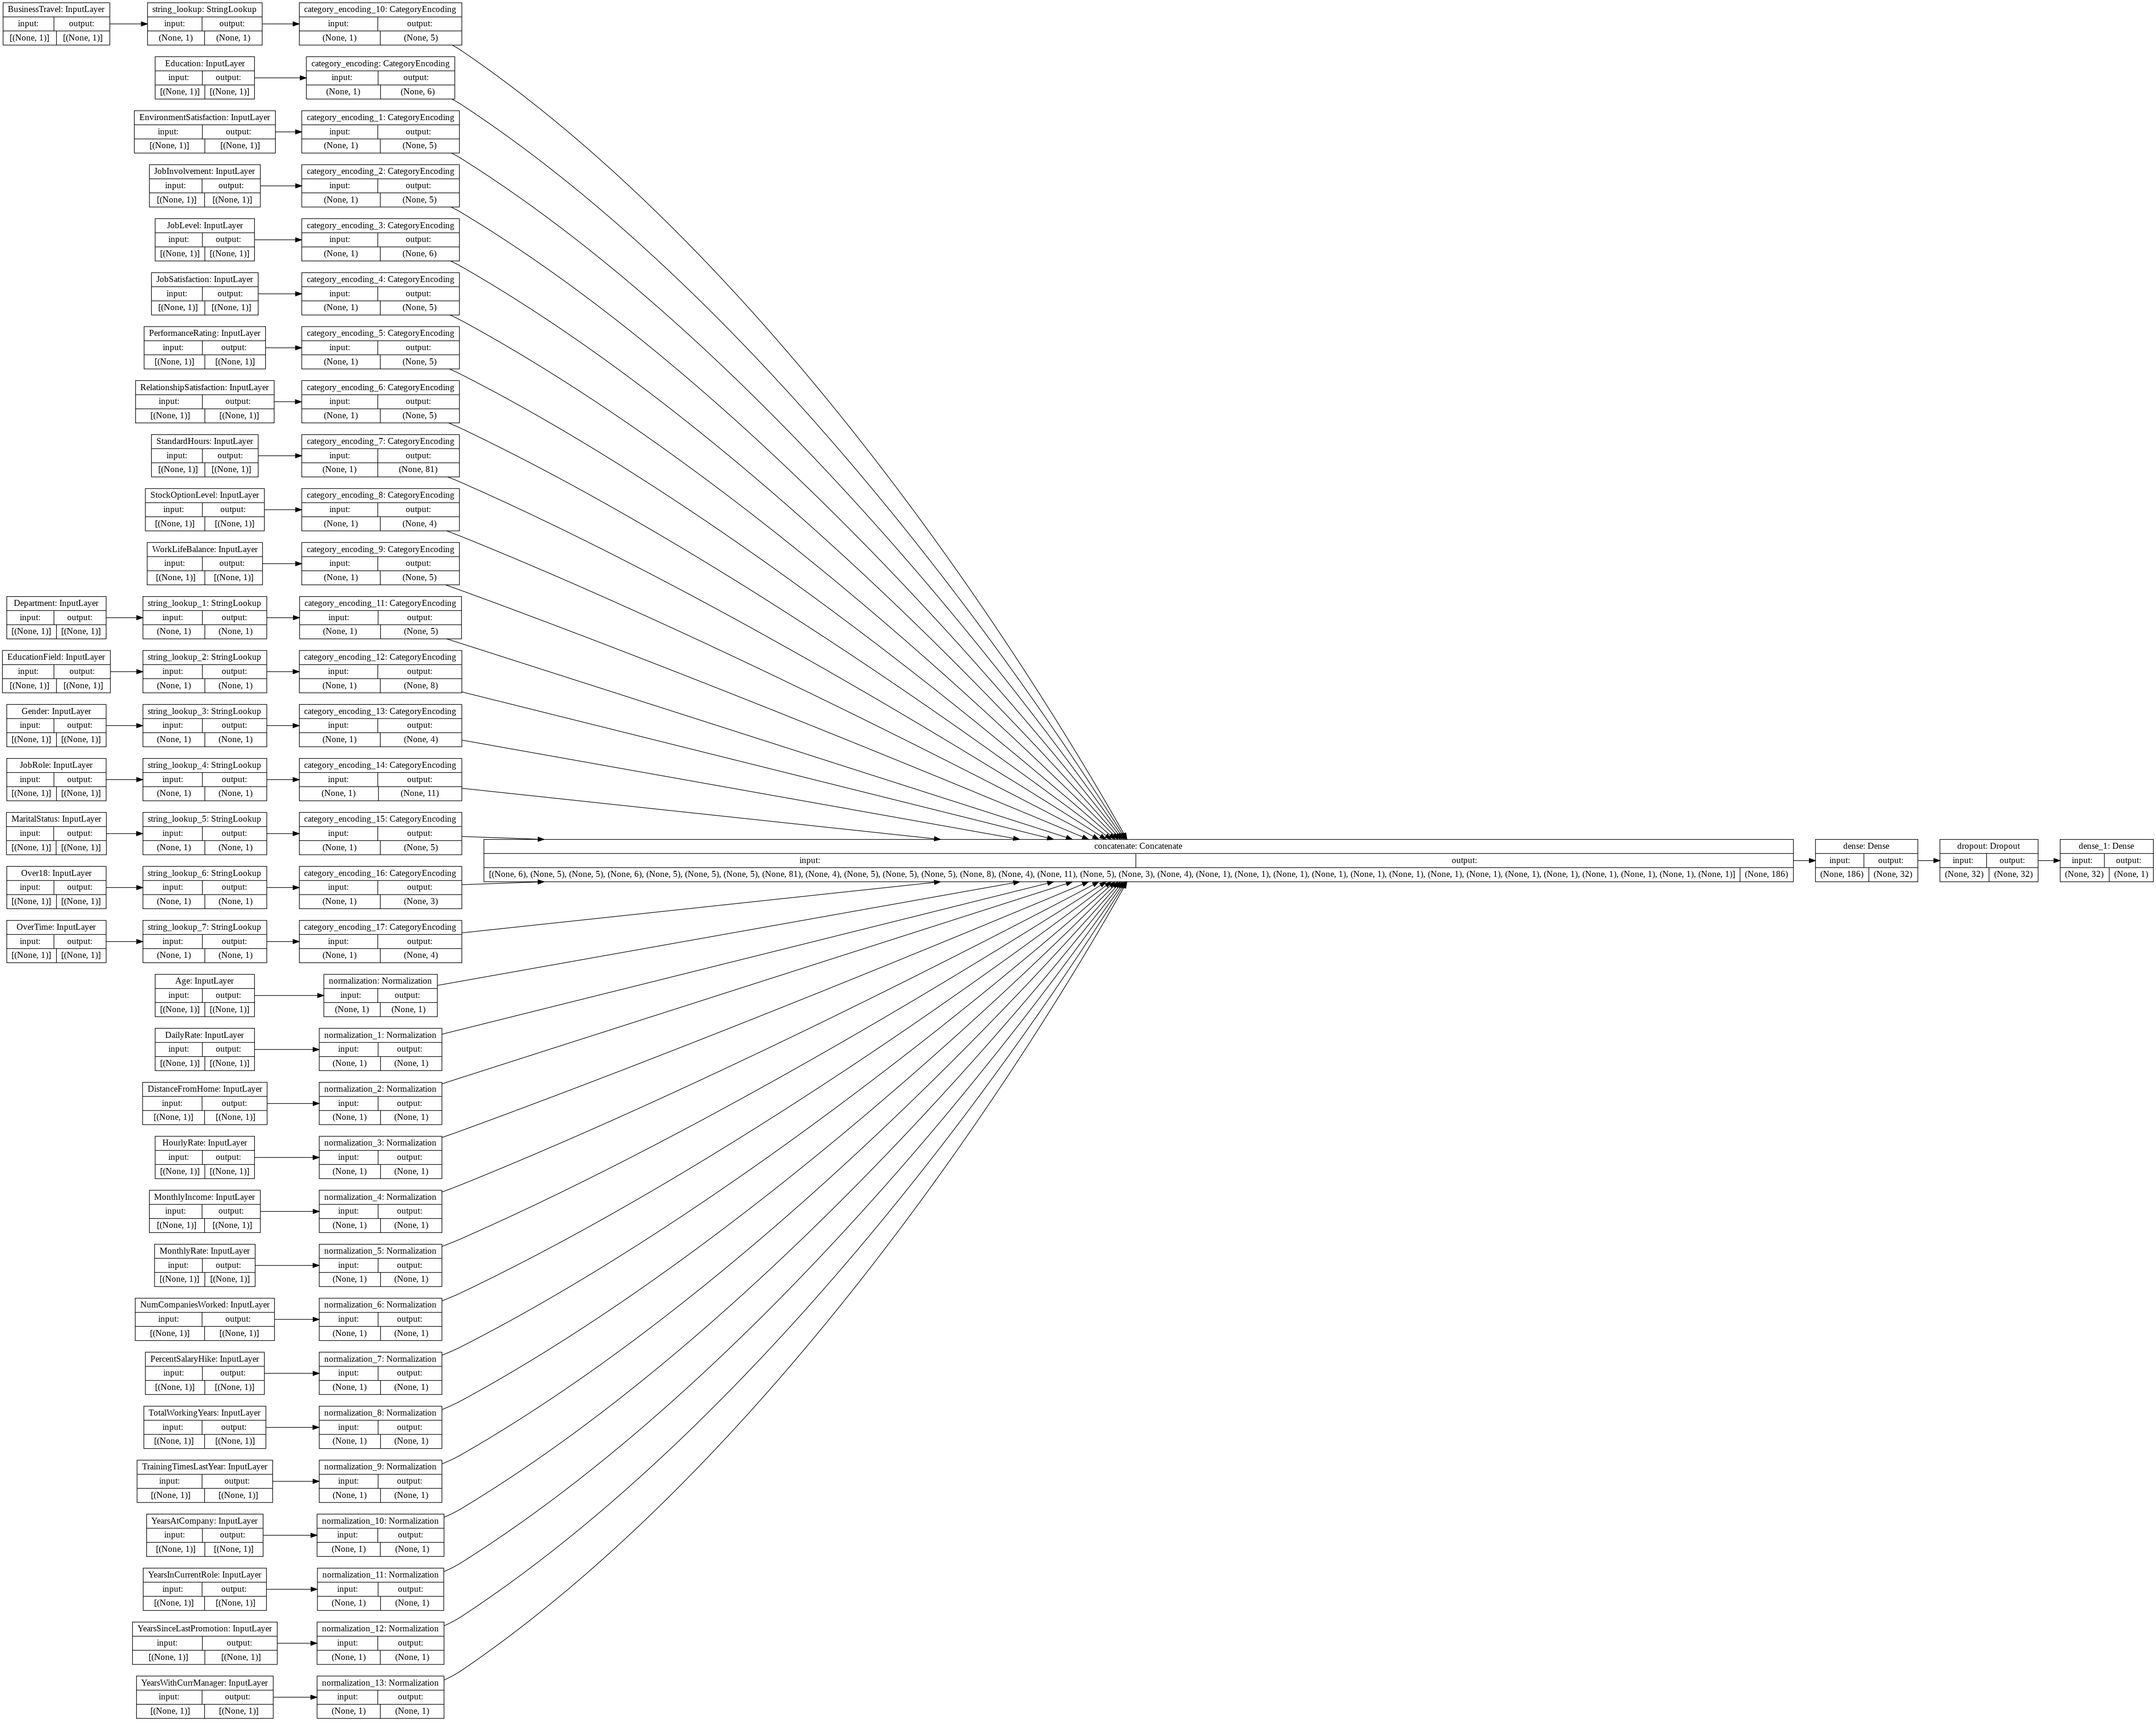

In [13]:
# `rankdir='LR'` is to make the graph horizontal.
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [14]:
model.fit(train_ds, epochs=50, validation_data=val_ds)


Epoch 1/50
26/26 [==============================] - 2s 27ms/step - loss: 0.5857 - accuracy: 0.7191 - val_loss: 0.4670 - val_accuracy: 0.8252
Epoch 2/50
26/26 [==============================] - 0s 5ms/step - loss: 0.4630 - accuracy: 0.8309 - val_loss: 0.4370 - val_accuracy: 0.8252
Epoch 3/50
26/26 [==============================] - 0s 5ms/step - loss: 0.3919 - accuracy: 0.8560 - val_loss: 0.4194 - val_accuracy: 0.8252
Epoch 4/50
26/26 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.8486 - val_loss: 0.4065 - val_accuracy: 0.8252
Epoch 5/50
26/26 [==============================] - 0s 5ms/step - loss: 0.3889 - accuracy: 0.8480 - val_loss: 0.3957 - val_accuracy: 0.8447
Epoch 6/50
26/26 [==============================] - 0s 5ms/step - loss: 0.3589 - accuracy: 0.8663 - val_loss: 0.3856 - val_accuracy: 0.8398
Epoch 7/50
26/26 [==============================] - 0s 5ms/step - loss: 0.3644 - accuracy: 0.8374 - val_loss: 0.3780 - val_accuracy: 0.8398
Epoch 8/50
26/26 [=

Predict (Taken from row 2 of test dataset [Employee Attrition test](https://docs.google.com/spreadsheets/d/e/2PACX-1vRsxR0nTrEaCqfro4FvGNDn6ZYYdQS0e2Tev1SMtJ5jYIjU0WGp77hp6btdJYkMl3XAk4lA01hxE30o/pub?gid=2057317048&single=true&output=csv) )





In [15]:
sample = {
    "Education": 2,
    "EnvironmentSatisfaction": 4,
    "JobInvolvement": 4,
    "JobLevel": 2,
    "JobSatisfaction": 1,
    "PerformanceRating": 3,
    "RelationshipSatisfaction": 3,
    "StandardHours": 80,
    "StockOptionLevel": 2,
    "WorkLifeBalance": 3,
    "BusinessTravel": "Travel_Rarely",
    "Department":"Research & Development",
    "EducationField":"Medical",
    "Gender":"Female",
    "JobRole":"Manufacturing Director",
    "MaritalStatus":"Divorced",
    "Over18":"Y",
    "OverTime":"No",
    "Age": 53,
    "DailyRate": 1084,
    "DistanceFromHome": 13,
    "HourlyRate": 57,
    "MonthlyIncome": 4450,
    "MonthlyRate": 26250,
    "NumCompaniesWorked": 1,
    "PercentSalaryHike": 11,
    "TotalWorkingYears": 5,
    "TrainingTimesLastYear": 3,
    "YearsAtCompany": 4,
    "YearsInCurrentRole": 2,
    "YearsSinceLastPromotion": 1,
    "YearsWithCurrManager": 3,
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
model.predict(input_dict)

array([[0.00051147]], dtype=float32)